<a href="https://colab.research.google.com/github/pikey-msc/RiesgosFinancieros/blob/master/2026-1/pca_emp_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"



Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 1304, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 1304 (delta 86), reused 68 (delta 68), pack-reused 1207 (from 2)
Receiving objects: 100% (1304/1304), 64.88 MiB | 21.90 MiB/s, done.
Resolving deltas: 100% (820/820), done.
Updating files: 100% (467/467), done.


In [2]:
%%R
library(MASS)

In [3]:
%%R

incump="RiesgosFinancieros/2020-2/Insumos/base_inc.csv"

data=read.csv(incump, sep=",", quote="/")

n<-nrow(data)-1
m=ncol(data)
x<-as.matrix(data.frame(data[2:n,3:m])/1)

G<-eigen((n)*cov(x)/(n-1))      #eigenvectores

g1<-G$values                  #eigenvalores

g1p<-g1/sum(g1) #porcentaje de varianza

g1pac<-g1/sum(g1) #porcentaje de varianza



for (i in (1:nrow(as.matrix(g1))))
{
g1pac[i]=sum(g1p[1:i])
}
print(g1pac)

g1pac=cumsum(g1p)
print(g1pac)

 [1] 0.5849264 0.7908101 0.8788158 0.9214424 0.9505772 0.9745325 0.9839964
 [8] 0.9926034 0.9970781 0.9995081 0.9998415 1.0000000
 [1] 0.5849264 0.7908101 0.8788158 0.9214424 0.9505772 0.9745325 0.9839964
 [8] 0.9926034 0.9970781 0.9995081 0.9998415 1.0000000


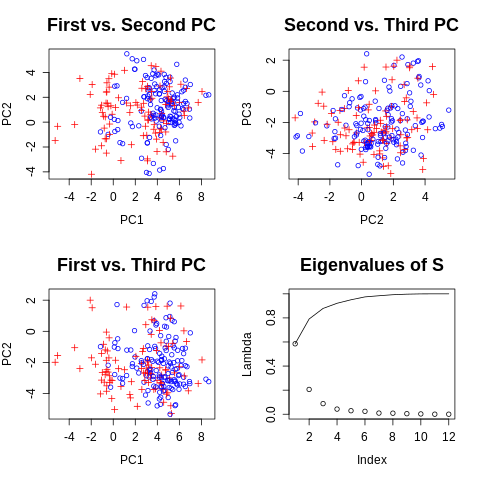

In [4]:
%%R
y<-as.matrix(x-colMeans(x))%*%G$vector

par(mfrow=c(2,2))
#grafica primero versus segundo
plot(y[,1],y[,2],pch=c(rep(1,100),rep(3,100)),col=c(rep("blue",100),rep("red",100)),xlab="PC1",ylab="PC2",main="First vs. Second PC",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)

#grafica segundo versus tercero
plot(y[,2],y[,3],pch=c(rep(1,100),rep(3,100)),col=c(rep("blue",100),rep("red",100)),xlab="PC2",ylab="PC3",main="Second vs. Third PC",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)

#grafica primero y tercero
plot(y[,1],y[,3],pch=c(rep(1,100),rep(3,100)),col=c(rep("blue",100),rep("red",100)),xlab="PC1",ylab="PC2",main="First vs. Third PC",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)

#gráfica de los eigenvalores
plot(g1p,ylim=c(0,1),xlab="Index",ylab="Lambda",main="Eigenvalues of S",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)
lines(g1pac)



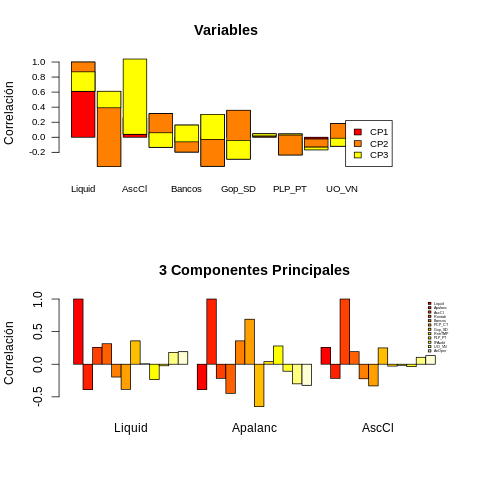

In [6]:
%%R
ycorx=cor(cbind(x,y))[1:(m-2),1:12]
min(ycorx)
max(ycorx)

#Gráfica de Correlación
par(mfrow=c(2,1))
library(MASS)
par(xpd=T, mar=par()$mar+c(0,0,0,4))
barplot(t(ycorx[,1:3]), main="Variables", ylab="Correlación", col=heat.colors(3), space=0.1, cex.axis=0.8, las=1,cex=0.8)
legend("bottomright", c("CP1", "CP2", "CP3"), cex=0.8, fill=heat.colors(3))
par(mar=c(5, 4, 4, 2) + 0.1)



barplot(ycorx[,1:3], main="3 Componentes Principales", ylab= "Correlación",
   beside=TRUE, col=heat.colors(12))

# Place the legend at the top-left corner with no frame
# using rainbow colors
legend("topright", row.names(ycorx), cex=0.3,
   bty="n", fill=heat.colors(12));


In [8]:
%%R
ycorx

              Liquid     Apalanc       AscCl      Rentab      Bancos
Liquid   1.000000000 -0.38911542  0.25848072  0.31459464 -0.19657783
Apalanc -0.389115416  1.00000000 -0.21897267 -0.44798022  0.35885518
AscCl    0.258480718 -0.21897267  1.00000000  0.19335984 -0.22283553
Rentab   0.314594640 -0.44798022  0.19335984  1.00000000 -0.33833861
Bancos  -0.196577827  0.35885518 -0.22283553 -0.33833861  1.00000000
PCP_CT  -0.385561031  0.69026708 -0.33215399 -0.47997425  0.39205007
Gop_SD   0.358406939 -0.64947332  0.25026808  0.40232881 -0.34675593
RetrTMP  0.007158221  0.03948107 -0.02860210  0.03327574 -0.02376554
PLP_PT  -0.235184485  0.28036061 -0.01615492 -0.18033638  0.10323652
IFAudit -0.023622532 -0.10731118 -0.03731347  0.10047713 -0.03206235
UO_VN    0.182085092 -0.30111900  0.10636917  0.21791942 -0.07295042
AnOper   0.192601353 -0.32393486  0.13269516  0.20411088 -0.23295106
             PCP_CT      Gop_SD      RetrTMP      PLP_PT      IFAudit
Liquid  -0.38556103  0.35840694  